
1(a).


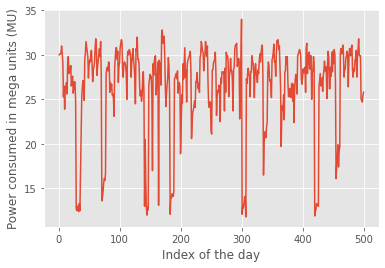


1(b).
Pearson correlation coefficient = 0.7675012766523829

1(c).


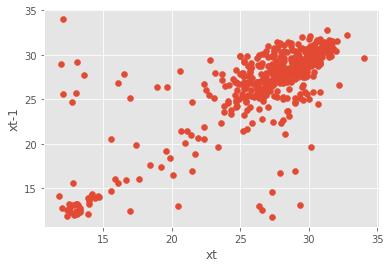


1(d).


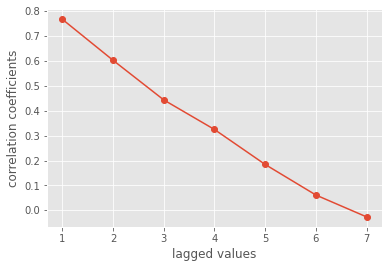


1(e).


ModuleNotFoundError: No module named 'statsmodels'

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt

data = pd.read_csv('datasetA6_HP.csv')
# 1(a). _______________________________
print('\n1(a).')
x=range(1,501)
y=data['HP']
plt.plot(x,y)     #line plot b/w index of the day and power consumed
plt.xlabel('Index of the day')
plt.ylabel('Power consumed in mega units (MU)')
plt.show()

# 1(b). _______________________

x = list(data['HP'])
xt = []
for i in range(1,500):
    xt.append(x[i])
    
xt1 =[]
for i in range(499):
    xt1.append(x[i])
print('\n1(b).\nPearson correlation coefficient =',np.corrcoef(xt,xt1)[0][1])

# 1(c). _____________________________
print('\n1(c).')
plt.scatter(xt,xt1)  #scatter plot 
plt.xlabel('xt')
plt.ylabel('xt-1')
plt.show()


# 1(d). ___________________________________
print('\n1(d).')
def timelag(p):  # this function will give Pearson correlation for time lag p
    xt =[]
    for i in range(p,500):
        xt.append(x[i])
    xt_lag =[]
    for i in range(500-p):
        xt_lag.append(x[i])
    
    corr=np.corrcoef(xt,xt_lag)[0][1]
    return corr

autoCorr=[]    
for i in range(1,8):
    autoCorr.append(timelag(i))
    
plt.plot(list(range(1,8)),autoCorr,marker='o')  
plt.xlabel('lagged values')
plt.ylabel('correlation coefficients')
plt.show()  
        
# 1(e).  ______________________
print('\n1(e).')  
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x,alpha=1,lags=list(range(1,8)))
plt.show()    
    
# 2. ___________________________________________________________________

test = x[len(x)-250:]
Actual = test[:len(test)-1]
Predicted = test[1:]
rmse =(mean_squared_error(Actual,Predicted))**0.5 
print('\n2. RMSE =',rmse)  # RMSE between predicted power consumed and original values for test data.

# 3(a). _________________________________________________________________

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

train, test = x[0:len(x)-250], x[len(x)-250:]
model = AutoReg(train, lags=5)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

rmse = (mean_squared_error(test, predictions))**0.5
print('\n3(a). Test RMSE: %.4f' % rmse) #RMSE computed for test data

plt.scatter(test,predictions)
plt.xlabel('Original test data')
plt.ylabel('Predicted test data')
plt.show()

# 3(b). __________________________
print('\n3(b).')
l = [1,5,10,15,25]

for i in l:
    model = AutoReg(train, lags=i)
    model_fit = model.fit()
    predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
    rmse = sqrt(mean_squared_error(test, predictions))
   
    print('Test RMSE for',i, 'is : %.4f' % rmse)  #RMSE between predicted and original data values

#3(c). ____________________________
minCorr =2/(len(train)**0.5)   # minimum correlation for allowed time lag
auto_cor=np.corrcoef(x[1:],x[:-1])[1,0]  #autocorrelation with 1 time lag
corr=[]          # list for storing autocorrelation values for different values of lags
i=2
while abs(auto_cor)>minCorr:   #loop for getting optimal lag value
    corr.append(auto_cor)
    auto_cor=np.corrcoef(x[i:],x[:-i])[1,0]
    i=i+1
    
optimal_p=len(corr)
model = AutoReg(train, lags=optimal_p)
model_fit = model.fit()

   
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
rmse_opt = (mean_squared_error(predictions,test))**0.5
print('\n3(c). Optimal value of lag using heuristics is',len(corr),'with RMSE = %.3f'%rmse_opt)
